<div class="alert alert-block alert-info">
    <h1 align="center">Classification of naloxone injection hours  </h1>
    <h3 align="center">Investigating the relationship between patient variables and drip hours naloxone  </h3>
</div>

 <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #01030E; text-align: center; line-height: 1.25;"><b> Naloxone Project_Stage 2 <span style="color: #000000"> 💹</span></b><br><span style="color: #0E6A8F; font-size: 24px"> Prediction of naloxone dose in opioids toxicity based on machine learning techniques (artificial intelligence)

</span></h1>



# <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Installing and Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Installing</b> naloxlib & other libraries and <b>importing them</b> to be used in this notebook.
</div>
👉  <b>naloxlib libraries</b> was created specifically for this project.
</div>

In [ ]:
import naloxlib
from naloxlib.classification import *

In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import cloudpickle
import imblearn.pipeline
import scikitplot as skplt  
import os
import glob
import warnings
import pandas as pd
import plotly.express as px
import sklearn
import tqdm.notebook
import tqdm.std
import xxhash
from matplotlib.dates import DateFormatter
from joblib.memory import Memory
from scipy.optimize import shgo
from joblib.memory import Memory
from yellowbrick.utils.helpers import get_model_name as get_model_name_original
from category_encoders.basen import BaseNEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from scipy import interp

warnings.filterwarnings('ignore')
%matplotlib inline


# <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Reading Dataset 👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>

## Load

In [6]:
#Let's Read Microsoft Excel file 
#Show some records of dataframe
data_Total = pd.read_excel("/Users/salio/Desktop/SalioL/Chief_data_naloxan_ForClassification.xlsx")
data_Total.sample(4)

,Unnamed: 0,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,...,CPK,PT,PTT,INR,Bullos.Of.Naloxan,Total_Naloxan,Class_Hours_Naloxan,Hours_Of_Naloxan,aspirationPneomonia,ICU
83,15,0,15,22.0,0,15,0,22,122,87,...,299,13.6,24.9,1.17,0.2,0.0,Less than 24 hours,0.0,1,1
170,14,1,42,4.0,1,14,2,12,110,70,...,207,14.5,33.6,1.30,0.4,0.0,Less than 24 hours,0.0,0,0
65,207,0,49,4.5,0,9,4,10,120,80,...,124,14.5,33.6,1.30,1.2,28.8,more than 24 hours,48.0,0,0
139,73,1,30,22.0,0,10,1,16,100,50,...,238,12.0,33.0,1.20,2.8,3.0,Less than 24 hours,3.0,1,0


In [7]:
data_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           221 non-null    int64  
 1   Sex                  221 non-null    int64  
 2   Age                  221 non-null    int64  
 3   time_duration        221 non-null    float64
 4   CoIngestion          221 non-null    int64  
 5   GCS                  221 non-null    int64  
 6   sign                 221 non-null    int64  
 7   RR                   221 non-null    int64  
 8   SBP                  221 non-null    int64  
 9   DBP                  221 non-null    int64  
 10  PR                   221 non-null    int64  
 11  T                    221 non-null    float64
 12  PH                   221 non-null    float64
 13  pCO2                 221 non-null    float64
 14  HCO3                 221 non-null    float64
 15  WBC                  221 non-null    flo

In [8]:
data_sel = data_Total.drop(["Unnamed: 0","Hours_Of_Naloxan","Total_Naloxan"],axis = 1)
data_sel.head()


,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,PR,...,ALP,LDH,CPK,PT,PTT,INR,Bullos.Of.Naloxan,Class_Hours_Naloxan,aspirationPneomonia,ICU
0,1,12,4.0,0,8,4,9,120,80,130,...,169.0,450.0,480,14.5,33.6,1.30,2.0,more than 24 hours,0,0
1,1,12,1.0,0,13,1,12,125,65,90,...,338.0,468.0,480,14.7,31.8,1.25,0.8,more than 24 hours,0,0
2,1,14,2.0,0,14,1,12,125,65,90,...,338.0,467.0,480,14.7,31.8,1.25,0.8,more than 24 hours,0,0
3,1,14,3.5,1,10,1,7,100,65,80,...,152.0,441.0,255,13.0,23.8,1.09,0.8,more than 24 hours,0,0
4,1,15,6.0,0,8,4,9,85,50,100,...,194.0,450.0,480,13.5,28.4,1.14,2.0,more than 24 hours,1,1


In [9]:
data_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  221 non-null    int64  
 1   Age                  221 non-null    int64  
 2   time_duration        221 non-null    float64
 3   CoIngestion          221 non-null    int64  
 4   GCS                  221 non-null    int64  
 5   sign                 221 non-null    int64  
 6   RR                   221 non-null    int64  
 7   SBP                  221 non-null    int64  
 8   DBP                  221 non-null    int64  
 9   PR                   221 non-null    int64  
 10  T                    221 non-null    float64
 11  PH                   221 non-null    float64
 12  pCO2                 221 non-null    float64
 13  HCO3                 221 non-null    float64
 14  WBC                  221 non-null    float64
 15  Hb                   221 non-null    flo

# <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Make Model Stage 2 💹
 ## 👉 This section selection of features to check predictions in models</div>


### <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;">Make Model Light Gradient Boosting Machine(lightgbm) Stage 2 💻👀</div>


### <div style="font-family: Trebuchet MS; background-color: #F02C20; color: #FFFFFF; padding: 12px; line-height: 1.5;">👉 Selection of features in models based on a RFECV method </div>

In [9]:
data_LGBMClassifier = data_sel[["HCO3","RR","sign","pCO2","Age","WBC","AST","PR","Bullos.Of.Naloxan","DBP","Hb","Cr","ALP","ALT","PLT","K","GCS","INR","BS","Sex","PH","LDH","Class_Hours_Naloxan"]]
data_LGBMClassifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HCO3                 221 non-null    float64
 1   RR                   221 non-null    int64  
 2   sign                 221 non-null    int64  
 3   pCO2                 221 non-null    float64
 4   Age                  221 non-null    int64  
 5   WBC                  221 non-null    float64
 6   AST                  221 non-null    float64
 7   PR                   221 non-null    int64  
 8   Bullos.Of.Naloxan    221 non-null    float64
 9   DBP                  221 non-null    int64  
 10  Hb                   221 non-null    float64
 11  Cr                   221 non-null    float64
 12  ALP                  221 non-null    float64
 13  ALT                  221 non-null    float64
 14  PLT                  221 non-null    int64  
 15  K                    221 non-null    flo

# <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;">  build_naloxone_model for classification ⚙</div>

In [10]:
build_naloxone_model(data=data_sel,session_id=123,train_size = 0.7)

,Description,Value
0,Session id,123
1,Target,Class_Hours_Naloxan
2,Target type,Binary
3,Target mapping,"Less than 24 hours: 0, more than 24 hours: 1"
4,Original data shape,"(221, 23)"
5,Transformed data shape,"(221, 23)"
6,Transformed train set shape,"(154, 23)"
7,Transformed test set shape,"(67, 23)"
8,Numeric features,22
9,Preprocess,True


<style type="text/css">
#T_329bf_row0_col0, #T_329bf_row0_col1, #T_329bf_row1_col0, #T_329bf_row1_col1, #T_329bf_row2_col0, #T_329bf_row2_col1, #T_329bf_row3_col0, #T_329bf_row3_col1, #T_329bf_row4_col0, #T_329bf_row4_col1, #T_329bf_row5_col0, #T_329bf_row5_col1, #T_329bf_row6_col0, #T_329bf_row6_col1 {
  text-align: left;
}
</style>
<table id="T_329bf">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_329bf_level0_col0" class="col_heading level0 col0" >Information</th>
      <th id="T_329bf_level0_col1" class="col_heading level0 col1" >Value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_329bf_level0_row0" class="row_heading level0 row0" >0</th>
      <td id="T_329bf_row0_col0" class="data row0 col0" >Outcome</td>
      <td id="T_329bf_row0_col1" class="data row0 col1" >Class_Hours_Naloxan</td>
    </tr>
    <tr>
      <th id="T_329bf_level0_row1" class="row_heading level0 row1" >1</th>
      <td id="T_329bf_row1_col0" class="data row1 col0" >Encoding</td>
      <td id="T_329bf_row1_col1" class="data row1 col1" >Less than 24 hours: 0, more than 24 hours: 1</td>
    </tr>
    <tr>
      <th id="T_329bf_level0_row2" class="row_heading level0 row2" >2</th>
      <td id="T_329bf_row2_col0" class="data row2 col0" >Dataset shape</td>
      <td id="T_329bf_row2_col1" class="data row2 col1" >(221, 34)</td>
    </tr>
    <tr>
      <th id="T_329bf_level0_row3" class="row_heading level0 row3" >3</th>
      <td id="T_329bf_row3_col0" class="data row3 col0" > Train_set shape</td>
      <td id="T_329bf_row3_col1" class="data row3 col1" >(154, 34)</td>
    </tr>
    <tr>
      <th id="T_329bf_level0_row4" class="row_heading level0 row4" >4</th>
      <td id="T_329bf_row4_col0" class="data row4 col0" > Test_set shape</td>
      <td id="T_329bf_row4_col1" class="data row4 col1" >(67, 34)</td>
    </tr>
    <tr>
      <th id="T_329bf_level0_row5" class="row_heading level0 row5" >5</th>
      <td id="T_329bf_row5_col0" class="data row5 col0" >Fold Generator</td>
      <td id="T_329bf_row5_col1" class="data row5 col1" >StratifiedKFold</td>
    </tr>
    <tr>
      <th id="T_329bf_level0_row6" class="row_heading level0 row6" >6</th>
      <td id="T_329bf_row6_col0" class="data row6 col0" >Fold Number</td>
      <td id="T_329bf_row6_col1" class="data row6 col1" >10</td>
    </tr>
  </tbody>
</table>


# <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Make Models 💹</div>

### <div style="font-family: Trebuchet MS; background-color: #13C3CF; color: #FFFFFF; padding: 12px; line-height: 1.5;">Make Model Light Gradient Boosting Machine(lightgbm) 💻👀</div>

In [12]:
lightgbm = make_machine_learning_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9667,0.8750,0.8750,0.8750,0.7333,0.7333
1,0.8750,0.9833,0.8750,0.8750,0.8750,0.7333,0.7333
2,0.8750,1.0000,0.8750,0.9062,0.8770,0.7500,0.7746
3,0.8750,0.9667,0.8750,0.9062,0.8770,0.7500,0.7746
4,0.9333,1.0000,0.9333,0.9394,0.9312,0.8421,0.8528
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9333,1.0000,0.9333,0.9444,0.9346,0.8571,0.8660
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9333,0.9630,0.9333,0.9400,0.9321,0.8571,0.8660


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Prediction on Test Sample   Light Gradient Boosting Machine 🔮</div>

In [13]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8955,0.9571,0.8955,0.8950,0.8951,0.7748,0.7752


## <div style="font-family: Trebuchet MS; background-color: #06A9D1; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Machine learning plot : Light Gradient Boosting Machine 📊</div>

In [ ]:
plot_machine(lightgbm, plot = 'feature_all')

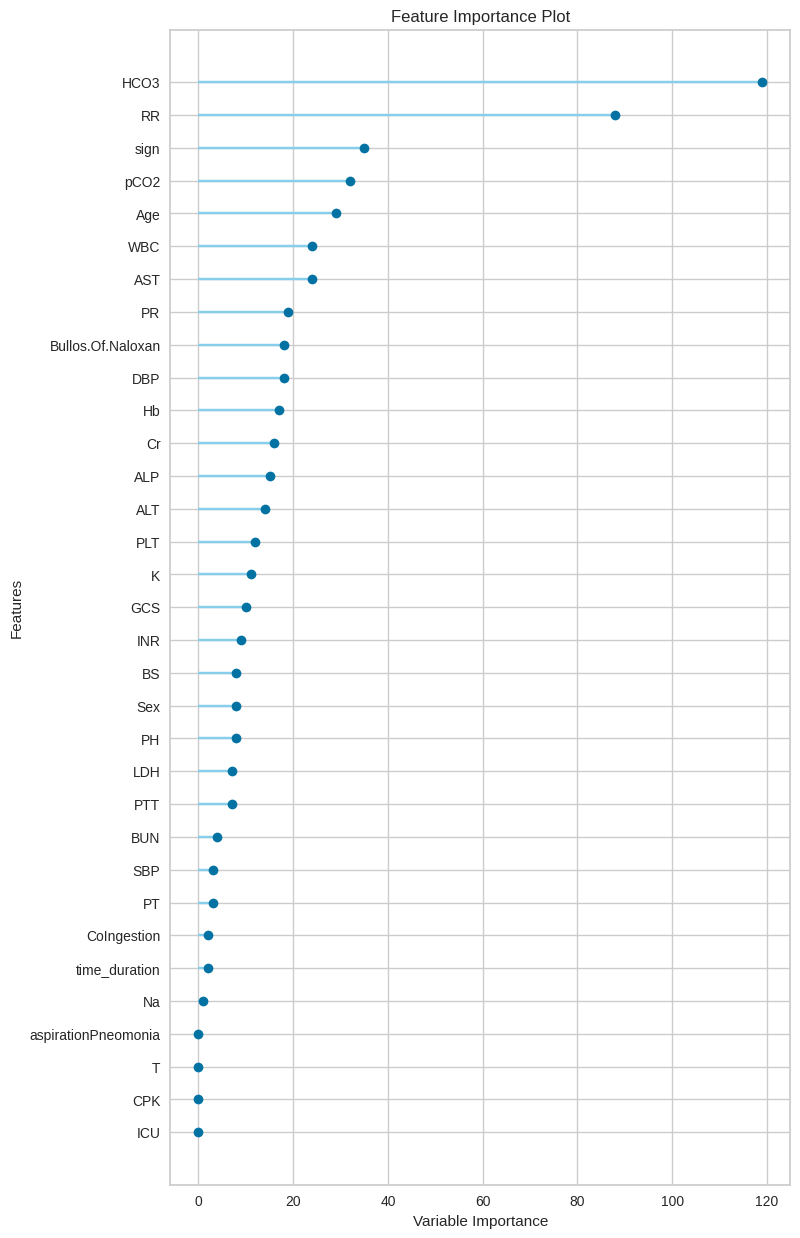

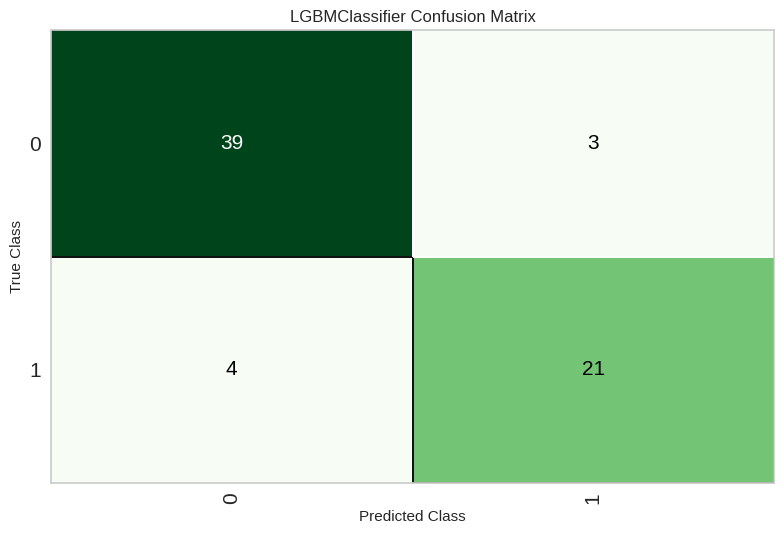

In [14]:
plot_machine(lightgbm, plot = 'confusion_matrix')

In [ ]:
plot_machine(lightgbm, plot = 'auc')

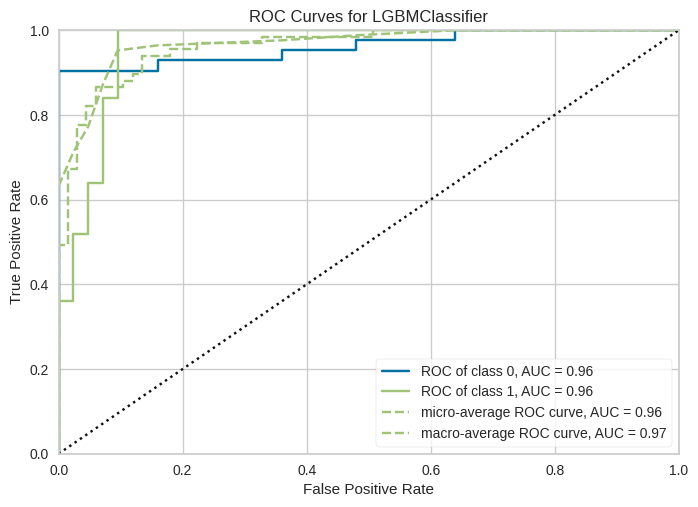

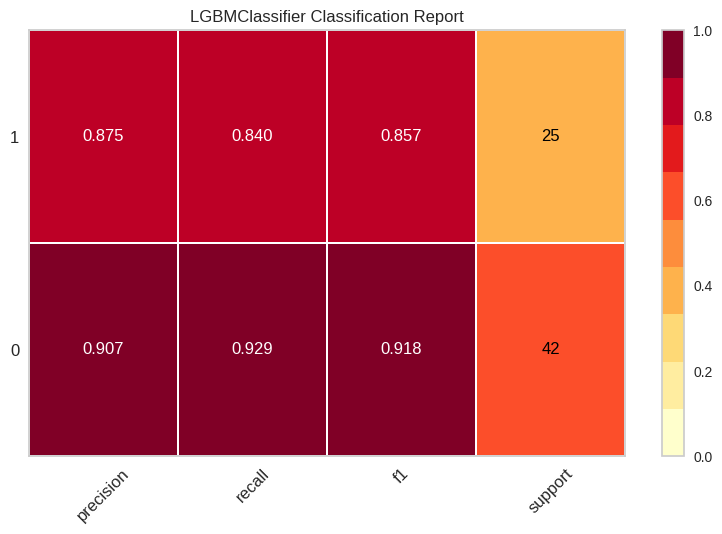

In [17]:
plot_machine(lightgbm, plot = 'class_report')